# K-Means Clustering 


## Import libraries

In [10]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pywaffle as Waffle
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score


## Import dataset


In [11]:

data = 'CC GENERAL.csv'
df = pd.read_csv(data)


### Kiểm tra hình dạng của tập dữ liệu

In [12]:
df.shape

(8950, 18)

### Preview the dataset

In [13]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Xem tóm tắt tập dữ liệu

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Kiểm tra các giá trị còn thiếu trong tập dữ liệu

In [15]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Chúng ta có thể thấy có 2 cột dư thừa trong tập dữ liệu. Chúng ta nên bỏ chúng 

In [ ]:
# Khởi tạo KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Bạn có thể thay đổi số lượng neighbors

# Huấn luyện và áp dụng KNN Imputer
imputed_data = imputer.fit_transform(df)

# Chuyển kết quả thành DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
print("\nDữ liệu sau khi xử lý giá trị khuyết bằng KNN Imputer:")
print(imputed_df)

### Loại bỏ các cột thừa

In [8]:
df.drop(['MINIMUM_PAYMENTS', 'CREDIT_LIMIT', ], axis=1, inplace=True)

### Xem lại bản tóm tắt của tập dữ liệu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Bây giờ, chúng ta có thể thấy các cột thừa đã bị xóa khỏi tập dữ liệu. 

Chúng ta có thể thấy rằng. Có 12 kiểu dữ liệu float và 3 kiểu int và một object vậy là đữ liệu int và folat đã được xác thực là dữ liệu hữu ích, còn lại là object để đơn giản hóa dữ liệu ta cần kiểm tra nó có sử dụng được không

### Tiến hành kiểm tra `CUST_ID`

In [10]:
df['CUST_ID'].unique()

array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

In [11]:
# view how many different types of variables are there

len(df['CUST_ID'].unique())

8950

Chúng ta thấy rằng có 8950  unique labels và Tổng số bản ghi trong tập dữ liệu là 8950 vậy nó là một Unique Identifier không đem lại thông tin hữu ích để dự đoán hay phân loại cần được loại bỏ để đơn giản hóa dữ liệu 

### Tiến hành Bỏ biến `CUST_ID` khỏi tập dữ liệu

In [12]:
df.drop(['CUST_ID',], axis=1, inplace=True)

## Phân tích thăm dò (EDA) 

### 2.1. Phân tích hạn mức và số dư dựa trên kỳ hạn 

Ở phần này, nhóm dùng thư viện quen thuộc để vẽ biểu đồ là Matplotlib để vẽ biểu đồ Scatter nhằm thể hiện rõ sự phân bố của hạn mức và số dư của tài khoản thông qua kỳ hạn tín dụng của khách hàng. 

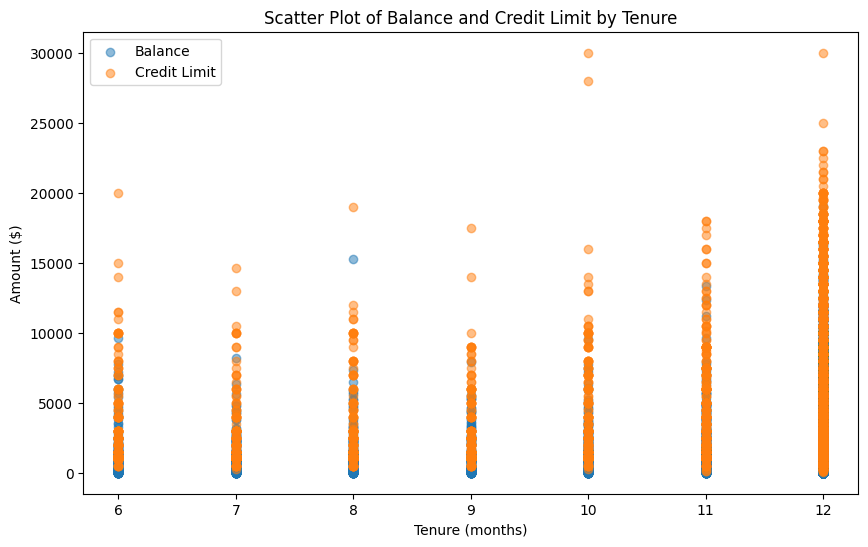

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('CC GENERAL.csv')

# Vẽ biểu đồ Scatter
plt.figure(figsize=(10, 6))
plt.scatter(data['TENURE'], data['BALANCE'], alpha=0.5, label='Balance')
plt.scatter(data['TENURE'], data['CREDIT_LIMIT'], alpha=0.5, label='Credit Limit')
plt.xlabel('Tenure (months)')
plt.ylabel('Amount ($)')
plt.title('Scatter Plot of Balance and Credit Limit by Tenure')
plt.legend()
plt.show()

Nhận xét: 

Biểu đồ scatter cho thấy rằng khi các giá trị Credit-limit tăng lên, phân phối/variance balance cũng tăng lên cho đến khi nó hình thành một hình dạng hình nón (heteroscedasticity). Ngoài ra, như đã đề cập trước đó, phần lớn khách hàng sử dụng thẻ tín dụng ưa chuộng thời gian sử dụng là 12 tháng. 

### 2.2. Phân tích số lượng mua so với tổng giao dịch 

Ở phần này, nhóm dùng các thư viện quen thuộc để vẽ biểu đồ là Matplotlib và Seaborn để vẽ biểu đồ dumbbell. 

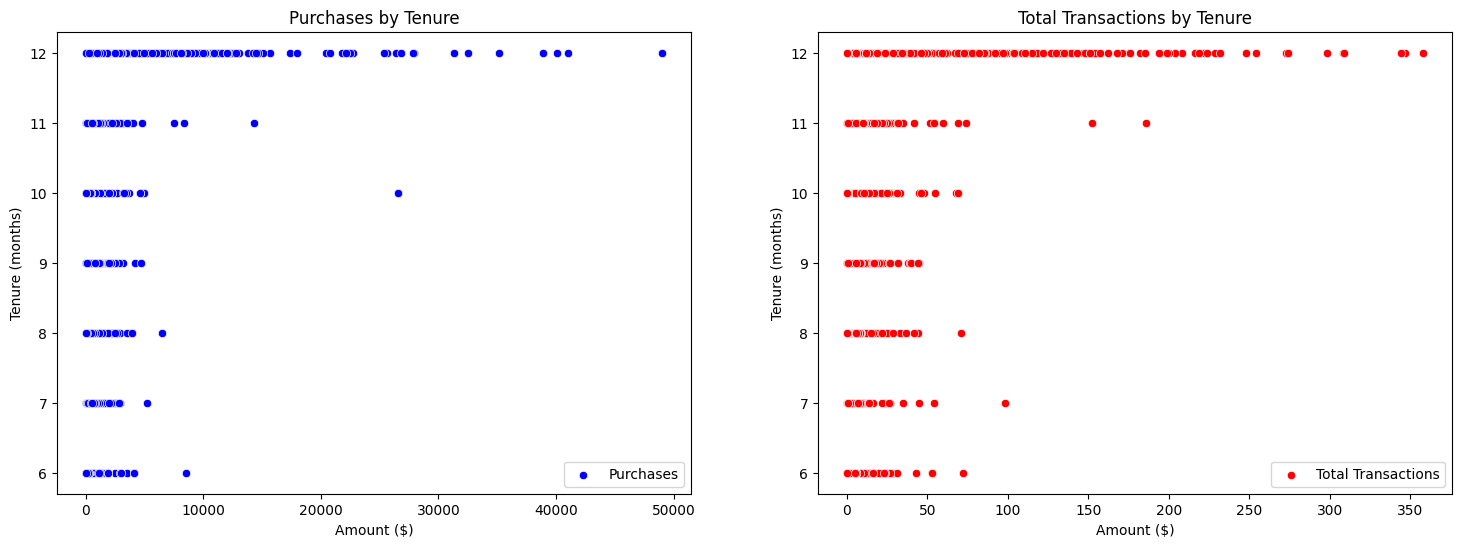

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_purchases_vs_transactions(data):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    sns.scatterplot(ax=axes[0], x='PURCHASES', y='TENURE', data=data, label='Purchases', color='blue')
    axes[0].set_xlabel('Amount ($)')
    axes[0].set_ylabel('Tenure (months)')
    axes[0].set_title('Purchases by Tenure')
    axes[0].legend()

    sns.scatterplot(ax=axes[1], x='PURCHASES_TRX', y='TENURE', data=data, label='Total Transactions', color='red')
    axes[1].set_xlabel('Amount ($)')
    axes[1].set_ylabel('Tenure (months)')
    axes[1].set_title('Total Transactions by Tenure')
    axes[1].legend()

    plt.show()

# Gọi hàm với dữ liệu của bạn
data = df
analyze_purchases_vs_transactions(data)

Nhận xét: Từ biểu đồ dumbbell ở trên, có thể kết luận rằng khách hàng sử dụng thẻ tín dụng với 12 tháng kỳ hạn thường sẵn sàng tiêu nhiều hơn và có nhiều giao dịch mua sắm hơn so với khách hàng có các kỳ hạn khác. Điều này liên quan đến đề cập trước đó, nơi khách hàng thường sẵn sàng trả nợ trong một khoảng thời gian dài để tăng lãi suất. Hơn nữa, một số khách hàng cố ý không thực hiện bất kỳ giao dịch nào (0 giao dịch và mua sắm) để có được hạn mức tín dụng cao, điều này ảnh hưởng đến việc tăng điểm tín dụng và tỷ lệ sử dụng tín dụng. 

Biểu đồ trên cũng cho thấy rằng khách hàng có mười hai tháng kỳ hạn có số tiền mua sắm cao hơn so với khách hàng có mười một tháng kỳ hạn. Tuy nhiên, điều này lại nghịch đảo với tổng số giao dịch, trong đó khách hàng có mười tháng kỳ hạn có ít giao dịch hơn so với khách hàng có mười một tháng kỳ hạn. Một ví dụ khác là khách hàng có bảy tháng kỳ hạn có số tiền mua sắm thấp hơn so với khách hàng có tám tháng kỳ hạn.

Tuy nhiên, tổng số giao dịch của khách hàng có bảy tháng kỳ hạn lại cao hơn so với khách hàng có tám tháng kỳ hạn.

### 2.3. Phân tích sự tương quan của các thuộc tính: 

Ở phần này, nhóm dùng các thư viện quen thuộc để vẽ biểu đồ là Matplotlib và Seaborn để vẽ biểu đồ heatmap. 

Biểu đồ correlation matrix sẽ được đính kèm các giá trị tương quan giữa các thuộc tính với nhau, các giá trị này được xác định là tốt hay không tốt bằng: 

Nếu  -0.3 < p-value < 0.3 thì độ tương quan của hai thuộc tính không tốt. 

Nếu  -0.7 < p-value < -0.3 hoặc 0.7 > p-value > 0.3 thì độ tương quan của hai thuộc tính tương đối tốt. 

Nếu  -1 < p-value < -0.7 hoặc 1 > p-value > 0.7 thì độ tương quan của hai thuộc tính rất tốt. 

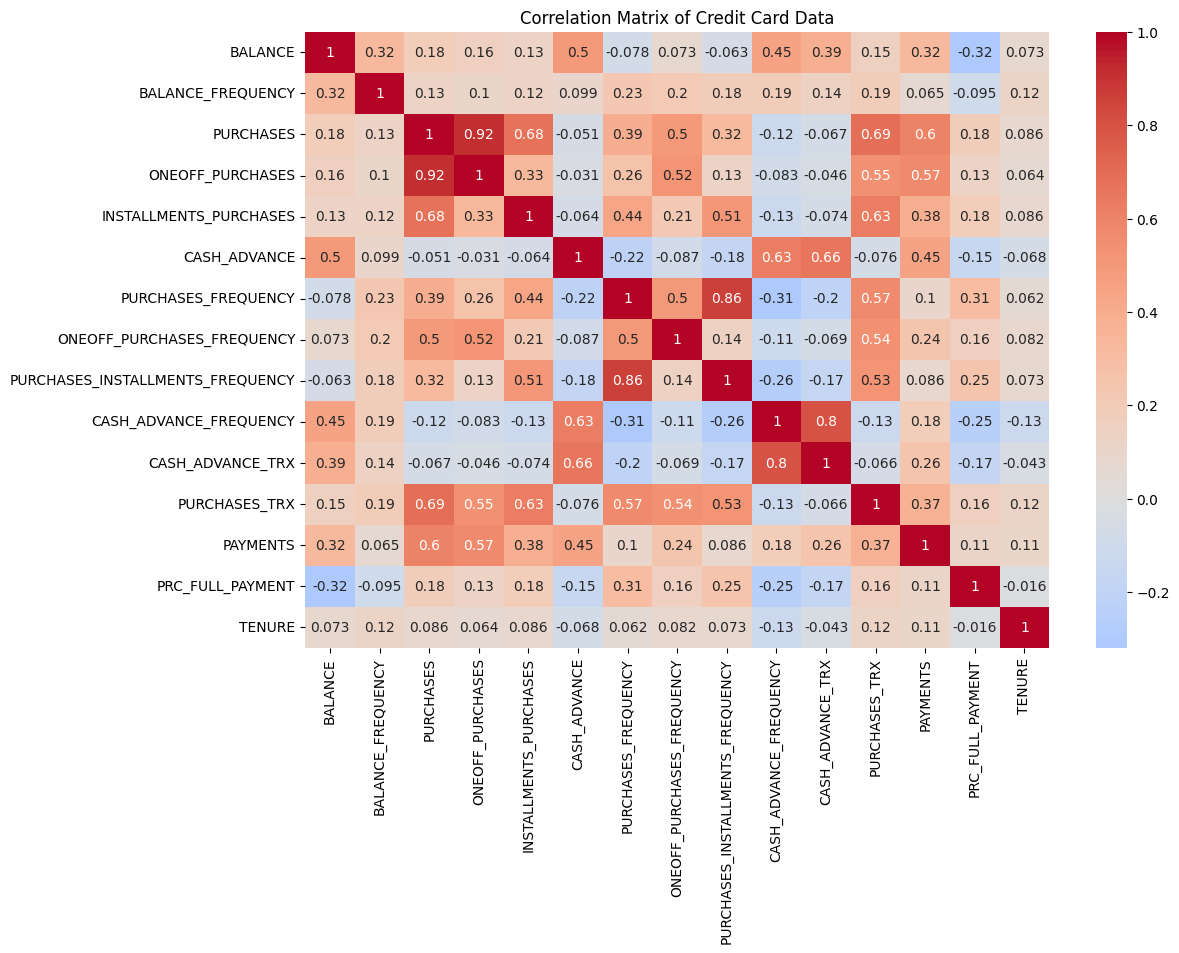

Độ tương quan giữa BALANCE_FREQUENCY và BALANCE tương đối tốt: 0.32
Độ tương quan giữa PURCHASES và BALANCE không tốt: 0.18
Độ tương quan giữa ONEOFF_PURCHASES và BALANCE không tốt: 0.16
Độ tương quan giữa INSTALLMENTS_PURCHASES và BALANCE không tốt: 0.13
Độ tương quan giữa CASH_ADVANCE và BALANCE tương đối tốt: 0.50
Độ tương quan giữa PURCHASES_FREQUENCY và BALANCE không tốt: -0.08
Độ tương quan giữa ONEOFF_PURCHASES_FREQUENCY và BALANCE không tốt: 0.07
Độ tương quan giữa PURCHASES_INSTALLMENTS_FREQUENCY và BALANCE không tốt: -0.06
Độ tương quan giữa CASH_ADVANCE_FREQUENCY và BALANCE tương đối tốt: 0.45
Độ tương quan giữa CASH_ADVANCE_TRX và BALANCE tương đối tốt: 0.39
Độ tương quan giữa PURCHASES_TRX và BALANCE không tốt: 0.15
Độ tương quan giữa PAYMENTS và BALANCE tương đối tốt: 0.32
Độ tương quan giữa PRC_FULL_PAYMENT và BALANCE tương đối tốt: -0.32
Độ tương quan giữa TENURE và BALANCE không tốt: 0.07
Độ tương quan giữa BALANCE và BALANCE_FREQUENCY tương đối tốt: 0.32
Độ tương quan

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_correlation(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Credit Card Data')
    plt.show()

    for col in correlation_matrix.columns:
        for row in correlation_matrix.index:
            if col != row:
                corr_value = correlation_matrix.loc[row, col]
                if -0.3 < corr_value < 0.3:
                    print(f"Độ tương quan giữa {row} và {col} không tốt: {corr_value:.2f}")
                elif -0.7 < corr_value < -0.3 or 0.7 > corr_value > 0.3:
                    print(f"Độ tương quan giữa {row} và {col} tương đối tốt: {corr_value:.2f}")
                elif -1 < corr_value < -0.7 or 1 > corr_value > 0.7:
                    print(f"Độ tương quan giữa {row} và {col} rất tốt: {corr_value:.2f}")

# Gọi hàm với dữ liệu của bạn
data = df
analyze_correlation(data)

## Chuẩn hóa dữ liệu: 

StandardScaler là một công cụ trong thư viện scikit-learn của Python được sử dụng để chuẩn hóa dữ liệu. Chuẩn hóa dữ liệu là quá trình biến đổi các biến số trong tập dữ liệu của bạn sao cho chúng có giá trị trung bình xấp xỉ 0 và phương sai xấp xỉ 1. Điều này giúp trong việc loại bỏ các ảnh hưởng của tỷ lệ giữa các biến số, giúp thuật toán học máy hoạt động tốt hơn. 


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def data_normalization():
    data = pd.read_csv('CC GENERAL.csv')
    print("\nData before normalization:")
    print(data.head())

    # Chỉ lấy các thuộc tính liên quan đến hành vi sử dụng thẻ tín dụng
    features = data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

    # Loại bỏ dữ liệu thiếu
    features.dropna(inplace=True)

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Chuyển đổi lại thành DataFrame và lưu vào file CSV
    features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
    features_scaled_df.to_csv('CC GENERAL Normalized.csv', index=False)

    print("\nData after normalization:")
    print(features_scaled_df.head())

# Gọi hàm
data_normalization()


Data before normalization:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1       

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8544\383859749.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)



Data after normalization:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2       

Sau khi có dữ liệu đã được chuẩn hóa, nhóm tiến hành giảm chiều dữ liệu bằng PCA. 

Principal Component Analysis (PCA) là một phương pháp sử dụng để giảm số chiều của dữ liệu bằng cách chuyển dữ liệu gốc sang một không gian mới, sao cho các thành phần chính (principal components) giữ lại phần lớn thông tin của dữ liệu. PCA thường được áp dụng sau khi đã chuẩn hóa dữ liệu bằng StandardScaler. 

In [23]:
# data_normalization()  # Gọi hàm mà không truyền đối số

# Giảm chiều dữ liệu bằng PCA (không bắt buộc)
pca = PCA(n_components=2)  
features_pca = pca.fit_transform(pd.read_csv('CC GENERAL Normalized.csv'))
features_pca_df = pd.DataFrame(features_pca, columns=['PC1', 'PC2'])
print("\nData after PCA:")
print(features_pca_df.head())

# Lưu dữ liệu đã được chuẩn hóa và giảm chiều vào file CSV
features_pca_df.to_csv('CC GENERAL PCA.csv', index=False)


Data after PCA:
        PC1       PC2
0 -1.696395 -1.122584
1 -1.215681  2.435638
2  0.935853 -0.385202
3 -1.614638 -0.724586
4  0.223701 -0.783610


## Xây dựng mô hình: 

### 4.1. Lựa chọn số cụm 

Việc lựa chọn số cụm là rất cần thiết cho một mô hình K-mean tối ưu.  

Phương pháp "Elbow" là một cách phổ biến để xác định số lượng thành phần chính (hoặc số chiều) tối ưu trong PCA hoặc số cụm tối ưu trong các thuật toán gom cụm như K-means. Phương pháp này giúp chúng ta tìm ra một giá trị "elbow" trên biểu đồ, nơi sự giảm giảm của phương sai hoặc lỗi bắt đầu chậm lại sau một số thành phần chính (hoặc số cụm). Giá trị ở "elbow" thường được coi là số lượng thành phần chính hoặc cụm tối ưu. Dưới đây là cách thực hiện phương pháp "Elbow": 

Vẽ biểu đồ với số lượng thành phần chính trên trục x và tỷ lệ phương sai đã giải thích bởi từng thành phần chính trên trục y. 

Trong biểu đồ, tìm điểm "elbow" hoặc điểm mà sự giảm giảm của tỷ lệ phương sai bắt đầu chậm lại. Điểm này thường là điểm mà bạn cân nhắc giữa việc giảm số lượng thành phần chính và giữ lại một lượng đáng kể của thông tin. 

Số lượng thành phần chính tối ưu là giá trị ứng với điểm "elbow" trên biểu đồ. 

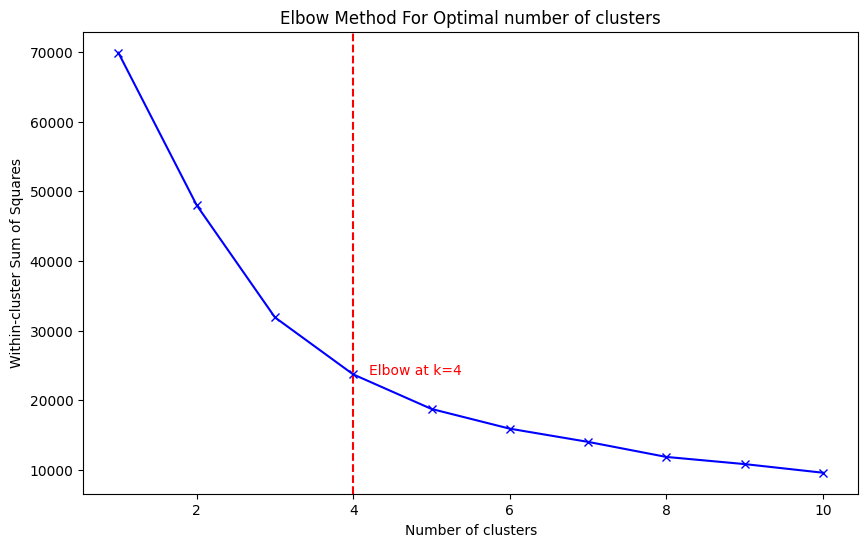

In [24]:

    # Đọc dữ liệu từ file CSV
    data = pd.read_csv('CC GENERAL PCA.csv')
    x = data 
   
    # Elbow method để tìm số cụm tối ưu
    wss = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        wss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, wss, 'bx-')
    plt.axvline(x=4, color='r', linestyle='--')
    plt.text(4.2, wss[3], 'Elbow at k=4', color='red')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-cluster Sum of Squares')
    plt.title('Elbow Method For Optimal number of clusters')
    plt.show()


Sau khi chạy phương pháp Elbow, chúng tôi thấy rằng khi K=4, mô hình sẽ được tối ưu nhất. 

### 4.2. Xây dựng mô hình K-mean: 

Sau khi có số cụm tối ưu,chúng tôi tiến hành xây dựng mô hình K-mean với K=4. Mô hình được xây dựng dựa trên thư viện sklearn. Dưới đây là một số biểu đồ trực quan kết quả của mô hình K-mean với k=4. 

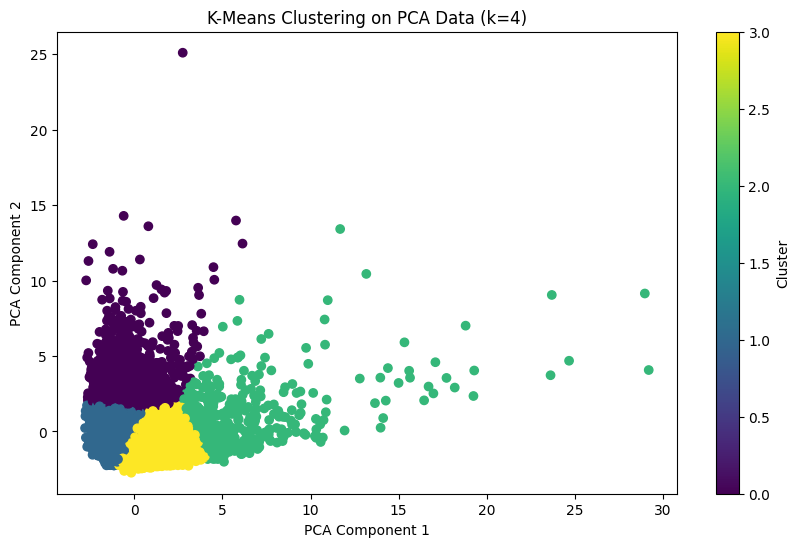

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc dữ liệu từ file CSV
data = pd.read_csv('CC GENERAL PCA.csv')

# Áp dụng K-means trên dữ liệu PCA
x = data 
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(x)
x['Cluster'] = kmeans_pca.labels_

# Vẽ đồ thị phân cụm với PCA
plt.figure(figsize=(10, 6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=x['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering on PCA Data (k={4})')
plt.colorbar(label='Cluster')
plt.show()

Silhouette plots là biểu đồ trực quan được sử dụng để đánh giá chất lượng của các phương pháp phân cụm (clustering). Silhouette plots biểu diễn đồ họa cho mỗi điểm dữ liệu trong các cụm và giá trị silhouette score của chúng, thể hiện độ tách biệt giữa các cụm. Giá trị silhouette score trung bình càng gần 1 mô hình phân cụm tốt, còn giá trị gần -1 thì mô hình phân cụm không tốt. 

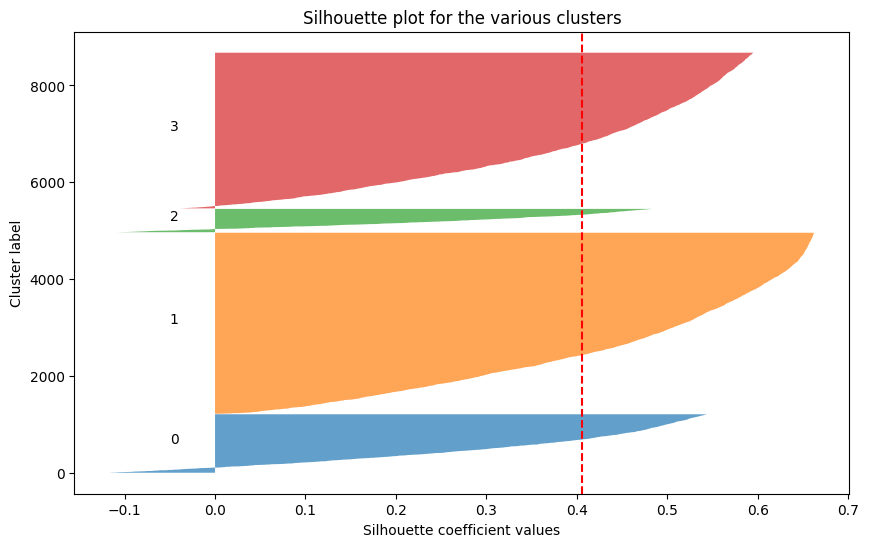

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Đọc dữ liệu từ file CSV
data = pd.read_csv('CC GENERAL PCA.csv')

# Áp dụng K-means trên dữ liệu PCA
x = data 
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(x)

# Vẽ biểu đồ Silhouette với PCA
silhouette_avg = silhouette_score(x, kmeans_pca.labels_)
sample_silhouette_values = silhouette_samples(x, kmeans_pca.labels_)
num_clusters = kmeans_pca.n_clusters

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_pca.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

Clusters Distribution là biểu đồ phân bố của các điểm dữ liệu trong các cụm (clusters) sau khi phân cụm bằng K-means (clustering) được áp dụng lên dữ liệu. 

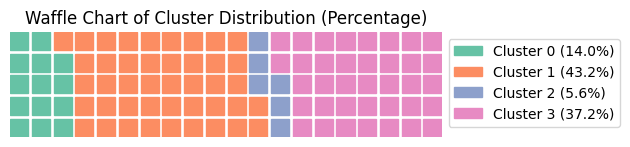

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Đọc dữ liệu từ file CSV
data = pd.read_csv('CC GENERAL PCA.csv')
x = data 

# Áp dụng K-means trên dữ liệu PCA
kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(x.iloc[:, :2])
x['Cluster'] = kmeans_pca.labels_

# Vẽ biểu đồ Waffle
cluster_counts = x['Cluster'].value_counts(normalize=True).sort_index() * 100
plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=cluster_counts,
    title={'label': 'Waffle Chart of Cluster Distribution (Percentage)', 'loc': 'center'},
    labels=[f"Cluster {i} ({count:.1f}%)" for i, count in enumerate(cluster_counts)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

Waffle chart là biểu đồ thể hiện phần trăm và tần suất xuất hiện của khách hàng của mỗi cụm trong tập dữ liệu. 